In [48]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/Income1.csv')
print(data.head(3))

   Unnamed: 0  Education     Income
0           1  10.000000  26.658839
1           2  10.401338  27.306435
2           3  10.842809  22.132410


In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None


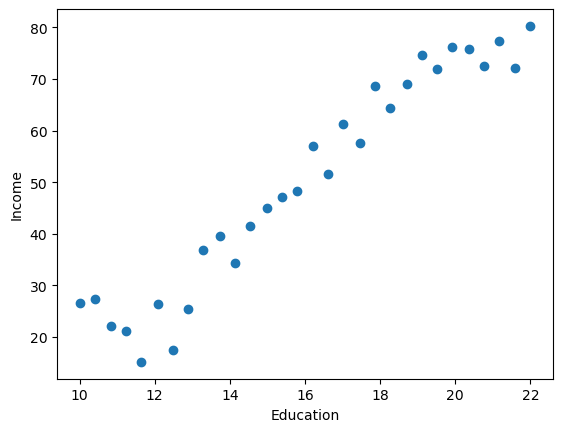

In [50]:
#散点图
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

In [51]:
#数据预处理
X = torch.from_numpy(data.Education.to_numpy().reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.to_numpy().reshape(-1, 1)).type(torch.FloatTensor)

In [52]:
print(X.size(), Y.size())

torch.Size([30, 1]) torch.Size([30, 1])


In [53]:
from torch import nn

class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()  #继承父类
        self.linear = nn.Linear(in_features=1, out_features=1) # 创建线性连接层

    def forward(self, inputs): # 在输入上调用
        logits = self.linear(inputs)
        return logits

In [54]:
model = EIModel()  # 创建模型实例
loss_fn = nn.MSELoss()  # 损失函数，内置的，均方误差
opt = torch.optim.SGD(model.parameters(), lr=0.0001) # 初始化优化器

In [55]:
torch.cuda.is_available()

True

In [56]:
for epoch in range(8000):
    for x, y in zip(X, Y):
        y_perd = model(x)
        loss = loss_fn(y_perd, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    print(epoch)
print("Done!")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [57]:
print(list(model.named_parameters()))

[('linear.weight', Parameter containing:
tensor([[5.2549]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-33.5461], requires_grad=True))]


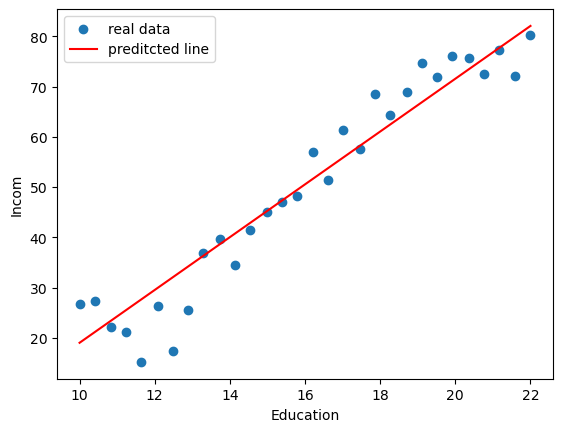

In [58]:
plt.scatter(data.Education, data.Income, label='real data')
plt.plot(X, model(X).detach().numpy(), c='r', label='preditcted line')
plt.xlabel('Education')
plt.ylabel('Incom')
plt.legend()
plt.show()